# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
%matplotlib inline 

# TODO: fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
image_shape = [np.shape(X_train)[1],np.shape(X_train)[2]]

# TODO: how many classes are in the dataset
n_classes = 42 #from signnames.csv file

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 42


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
print('training examples')
print(len(y_train))
print(np.shape(X_train))
print('test examples')
print(len(y_test))
print(np.shape(X_test))
print('shape of image')
print([np.shape(X_train)[1],np.shape(X_train)[2]])

training examples
39209
(39209, 32, 32, 3)
test examples
12630
(12630, 32, 32, 3)
shape of image
[32, 32]


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Turn image to greyscale function
def RGB_2_GRAY(image_array):
    return cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

### Normalization function
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )


###Turn train data grayscale and normalize it
g_X_train = np.zeros([n_train,32,32]) # g is for grayscale
n_g_X_train = np.zeros([n_train,32,32]) # n is for normalized
for i in range(n_train):
    g_X_train[i] = RGB_2_GRAY(X_train[i])
    n_g_X_train[i] = normalize_grayscale(g_X_train[i])

###Turn test data grayscale and normalize it
g_X_test = np.zeros([n_test,32,32]) # g is for grayscale
n_g_X_test = np.zeros([n_test,32,32]) # n is for normalized
for i in range(n_test):
    g_X_test[i] = RGB_2_GRAY(X_test[i])
    n_g_X_test[i] = normalize_grayscale(g_X_test[i])

### Question 1 

_Describe the techniques used to preprocess the data._

I mainly used 2 techniques to pre-process the data:
1) Grayscale: before the images where in RGB, so there were 3 pieces of data, or features, per pixel. After grayscaling the pictures, there is only one feature or piece of data per pixel. This simplifies the image and it is better for the machine learning algorithm.
2) Normalization: I took the normalization function given in the lectures to change the grayscale values from 0-255 to 0.1-0.9 to have a zero mean and standard deviation, again, this is better for training the data and getting better results as explained in the lectures.

**Answer:**

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
num_channels = 1 # grayscale

def reformat(dataset, labels):
    dataset = dataset.reshape(
    (-1, 32, 32, num_channels)).astype(np.float32)
    labels = (np.arange(n_classes) == labels[:,None]).astype(np.float32)
    return dataset, labels

def shuffle_set(dataset, labels):
    arr = range(dataset.shape[0])
    random_array = random.sample(arr,dataset.shape[0])
    return dataset[random_array],labels[random_array]
###SHUFFLING
shuffled_train_dataset, shuffled_train_labels = shuffle_set(n_g_X_train,y_train)

###TRAINING
train_dataset = shuffled_train_dataset[0:30000]
train_labels = shuffled_train_labels[0:30000]
train_dataset , train_labels = reformat(train_dataset , train_labels)

###VALIDATION
valid_dataset = shuffled_train_dataset[30000:39209]
valid_labels = shuffled_train_labels[30000:39209]
valid_dataset , valid_labels = reformat(valid_dataset , valid_labels)

###TESTING: already X_test, not modified
test_dataset = n_g_X_test[:]
test_labels = y_test[:]
test_dataset , test_labels = reformat(test_dataset , test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

### Feel free to use as many code cells as needed.

Training set (30000, 32, 32, 1) (30000, 42)
Validation set (9209, 32, 32, 1) (9209, 42)
Test set (12630, 32, 32, 1) (12630, 42)


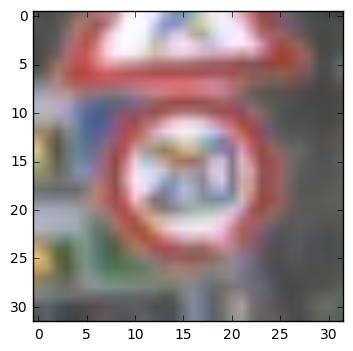

In [6]:
plt.imshow(X_train[0])#this prints the image unchanged, in color

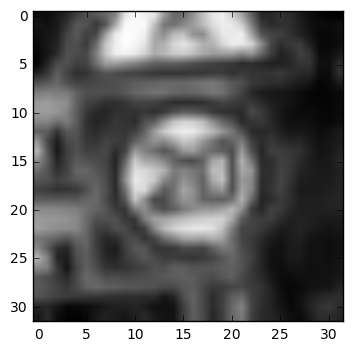

In [7]:
plt.imshow(g_X_train[0],cmap='gray') # this prints the image in gray

In [8]:
print(n_g_X_train[0][1]) # prints one row of the image to show the values range from 0.1 to 0.9 (after normalization)

[ 0.36039216  0.35098039  0.36980392  0.42941176  0.5172549   0.50156863
  0.44196078  0.50784314  0.70235294  0.88431373  0.88745098  0.88745098
  0.75254902  0.58313725  0.57058824  0.62078431  0.67411765  0.74
  0.81529412  0.85607843  0.84666667  0.78392157  0.60196078  0.44509804
  0.41058824  0.42313725  0.41686275  0.38235294  0.35098039  0.33843137
  0.33843137  0.34784314]


5


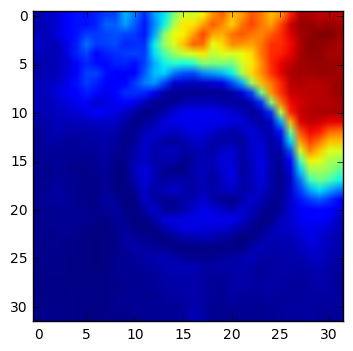

In [9]:
###To show that the shuffling of the train_dataset/train_labels work
plt.imshow(shuffled_train_dataset[11])
print(shuffled_train_labels[11])

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Testing set is left alone, no need to modify it.
The training set is modified by first shuffling it, then I use about 80% as training data and 20% as validation set.

In [50]:
tf.reset_default_graph()

In [288]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

n_input = image_shape[0]*image_shape[1]   # data input (img shape: 32*32)
num_channels = 1 # grayscale
num_hidden = 64
batch_size = 60
depth = 16
patch_size = 5

graph = tf.Graph()
with graph.as_default():

    tf_train_dataset = tf.placeholder("float",shape = (batch_size, 32, 32, num_channels))
    tf_train_labels = tf.placeholder("float", shape = (batch_size, n_classes))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
    

    layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth       , depth], stddev=0.1))
    #layer3_weights = tf.Variable(tf.truncated_normal([32 // 4 * 32 // 4 * depth, num_hidden]      , stddev=0.1))
    layer3_weights = tf.Variable(tf.truncated_normal([256, num_hidden]      , stddev=0.1))
    layer3_2_weights = tf.Variable(tf.truncated_normal([num_hidden, num_hidden]      , stddev=0.1))
    layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, n_classes], stddev=0.1))

    layer1_biases = tf.Variable(tf.zeros([depth]))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[n_classes]))

    #tf.reset_default_graph()

    def model(data):
        print(data.get_shape())
        conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
        print("conv1")
        print(conv.get_shape())
        hidden = tf.nn.relu(conv + layer1_biases)
        print(hidden.get_shape())
        #conv_layer = tf.nn.max_pool(hidden, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
        print("conv2")
        print(conv.get_shape())
        hidden = tf.nn.relu(conv + layer2_biases)
        conv_layer = tf.nn.max_pool(hidden, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        print("max")
        print(conv_layer.get_shape())
        shape = conv_layer.get_shape().as_list()
        reshape = tf.reshape(conv_layer, [shape[0], shape[1] * shape[2] * shape[3]])
        print("before FC1")
        print(reshape.get_shape())
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        print("FC1")
        print(hidden.get_shape())
        hidden = tf.nn.relu(tf.matmul(hidden, layer3_2_weights) + layer3_biases)
        print("FC2")
        print(hidden.get_shape())
        return tf.matmul(hidden, layer4_weights) + layer4_biases

    # Define loss and optimizer
    logits = model(tf_train_dataset)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))
    
    init = tf.initialize_all_variables()

print("Done!")

(60, 32, 32, 1)
conv1
(60, 16, 16, 16)
(60, 16, 16, 16)
conv2
(60, 8, 8, 16)
max
(60, 4, 4, 16)
before FC1
(60, 256)
FC1
(60, 64)
FC2
(60, 64)
(9209, 32, 32, 1)
conv1
(9209, 16, 16, 16)
(9209, 16, 16, 16)
conv2
(9209, 8, 8, 16)
max
(9209, 4, 4, 16)
before FC1
(9209, 256)
FC1
(9209, 64)
FC2
(9209, 64)
(12630, 32, 32, 1)
conv1
(12630, 16, 16, 16)
(12630, 16, 16, 16)
conv2
(12630, 8, 8, 16)
max
(12630, 4, 4, 16)
before FC1
(12630, 256)
FC1
(12630, 64)
FC2
(12630, 64)
Done!


In [168]:
###Used to calculate the accuracy of the model
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/ predictions.shape[0])

In [169]:
###used to generate minibatch
def mini_batch(train_dataset, train_labels, size):
    arr = range(train_dataset.shape[0])
    random_array = random.sample(arr,size)
    return train_dataset[random_array], train_labels[random_array]

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

For now, I grabbed the example from the tensorflow lecture and have an arquitecture with:
inputs (1024) -> hidden layer (256) -> outputs (42). It has 1 middle layer with 1 input layer and 1 output layer. I am doing a relu activation between the hidden layer and the outputlayer to introduce a non-linearity to the system. I saw this was not enough and had to introduce convolutional layers.

My final architecture looks like this for this convolutional network:

inputs(batch_sizex32x32x1)

(batch_sizex32x32x1)-> convolutional#1 ->(batch_sizex16x16x16), stride = 1x2x2x1, same padding, kernel size 5x5xbatch_sizex16

-> relu ->

batch_sizex16x16x16)-> convolutional#2 ->(batch_sizex8x8x16), stride = 1x2x2x1 , same padding, kernel size 5x5x6x16

-> relu ->

(batch_sizex8x8x16)-> maxpooling->(batch_sizex4x4x16)

(batch_sizex256)-> fully connected layer-> (batch_sizex64)

(batch_sizex64)-> fully connected layer->(batch_sizex64)

(batch_sizex64)-> outputs

In [272]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Parameters
learning_rate = 0.05
#training_epochs = 15
num_steps = 3501
#batch_size = 30 # initialized before, shown here for reference
assert train_dataset.shape[0]%batch_size == 0
display_step = 1


# Launch the graph
#with tf.Session(graph=graph) as sess:
# Initializing the variables
sess = tf.Session(graph=graph)
sess.run([init])
for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data , batch_labels = mini_batch(train_dataset, train_labels, batch_size)
    #batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    #batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset: batch_data, tf_train_labels: batch_labels}
    _, l, predictions = sess.run([optimizer, cost, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
        print('Minibatch loss at step %d: %f' % (step, l))
        print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
        print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(session=sess), valid_labels))
print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(session=sess), test_labels))        

Minibatch loss at step 0: 4.066815
Minibatch accuracy: 10.0%
Validation accuracy: 4.9%
Minibatch loss at step 50: 3.447979
Minibatch accuracy: 10.0%
Validation accuracy: 8.1%
Minibatch loss at step 100: 3.235723
Minibatch accuracy: 3.3%
Validation accuracy: 7.2%
Minibatch loss at step 150: 3.323044
Minibatch accuracy: 8.3%
Validation accuracy: 7.3%
Minibatch loss at step 200: 3.466316
Minibatch accuracy: 5.0%
Validation accuracy: 8.7%
Minibatch loss at step 250: 3.274081
Minibatch accuracy: 3.3%
Validation accuracy: 8.0%
Minibatch loss at step 300: 3.100215
Minibatch accuracy: 16.7%
Validation accuracy: 10.9%
Minibatch loss at step 350: 3.192670
Minibatch accuracy: 16.7%
Validation accuracy: 10.8%
Minibatch loss at step 400: 3.252537
Minibatch accuracy: 13.3%
Validation accuracy: 13.0%
Minibatch loss at step 450: 3.131729
Minibatch accuracy: 21.7%
Validation accuracy: 16.4%
Minibatch loss at step 500: 2.917286
Minibatch accuracy: 16.7%
Validation accuracy: 16.4%
Minibatch loss at step 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Type of optimizer: Stochastic gradiant descent, from tensorflow:

tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
Batch size: almost twice the amount of classes = 60
    
epochs: 4000 is enough. Changed to 3500 when putting the max pooling after the 2 conv layers.

Hyperparameters:
    Learning rate: 0.05
    Patch size: 5
    depth: 16

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
I based my model/architecture on the udacity/classroom link posted before 'Deep Neural Network in TensorFlow', and added elements from the paper stated above 'Traffic Sign Recognition with Multi-Scale Convolutional Networks' by Pierre Sermanet and Yann LeCun, however the architecture there was not very clear to me. Then, I went to Udacity's deep learning course and grabbed the architecture they use to classify the notMNIST data set which is a sent of convolutional layers with a final fully connected layer. Then, I modified this architecture tunning the hyperparameters, batch size, epochs, etc. until I got the desired results.

After talking to my mentor, he recommended adding a second fully connected layer so now I have 2 fully connected layers back to back. I also added max pooling after my first convolutional layer.

Update 28-Nov-2016:
After reading http://cs231n.github.io/convolutional-networks/ I put the max-pooling operation after the 2 conv layers. It didn't improve the overall accuracy, but did reduce the amount of iterations from 4000 to 3500.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [273]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

def load_data(data_dir):
    count = 0
    images = np.zeros((len(os.listdir(data_dir)), 32, 32))
    for f in os.listdir(data_dir):
        im = cv2.imread(os.path.join(data_dir, f),0) #read image as gray scale
        im = cv2.resize(im, (32, 32)) #resize to 32x32
        images[count] = im
        count += 1
    return images


    # Load training and testing datasets.
path_images= "/home/carlos/traffic-signs/New Data"
images_pre = load_data(path_images)
labels_pre = np.array([25, 4, 4, 7, 14 , 7, 25, 14 ]) #labelled the data by hand
images , labels = reformat(images_pre, labels_pre) #one hot encoding and adding num_channels
images = normalize_grayscale(images) #normalize images

with graph.as_default():

    tf_new_test_dataset = tf.constant(images)
    new_test_prediction = tf.nn.softmax(model(tf_new_test_dataset))
    predicted_labels = tf.argmax(new_test_prediction, 1)
    
print("Test accuracy: %.1f%%" % accuracy(new_test_prediction.eval(session=sess), labels))
predictions = sess.run([predicted_labels],feed_dict={tf_new_test_dataset:images})
print('True labels:')
print(labels_pre)
print('Predictions:')
print(predictions[0])

Test accuracy: 37.5%
True labels:
[25  4  4  7 14  7 25 14]
Predictions:
[ 0 37 14 38 14  1 25 14]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
There are a couple of qualities that make classification difficult:
1) When I downloaded the image from the internet, and then resized it to 32x32, the structure of the image itself was lost, as it can be seen by images for speed limit 100 (Truth 7), where the number 100 is kind of 'disfigured'
2) When the sign is not centered, or at an angle, like the road work image below (Truth 25) compared to the other road work image that is centered.
3) When the image is centered and closer, and clearer like the stop signs below, the classifier is easier for it to work.

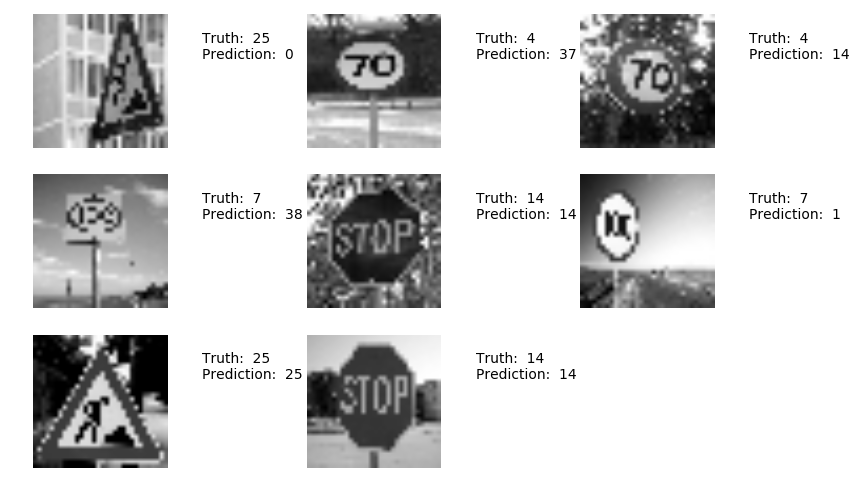

In [274]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
fig = plt.figure(figsize=(10,10))
for i in range(len(images_pre)):
    plt.subplot(5,3,1+i)
    plt.axis('off')
    plt.text(40,10,"Truth:  {0}\nPrediction:  {1}".format(labels_pre[i], predictions[0][i]))
    plt.imshow(images_pre[i],cmap='gray')

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


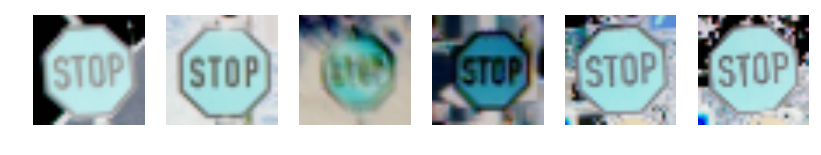

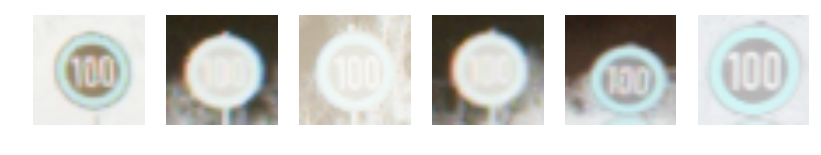

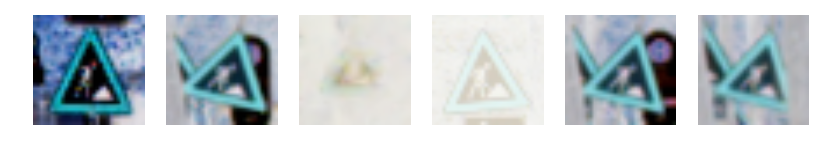

In [327]:
#Plotting a couple of stop signs from the test data set X_test and y_test

#plt.imshow(X_test[8]) #road work sign
#plt.imshow(X_test[11],X_test[13]) #100 sign
#plt.imshow(X_test[18])

def plot_signs(label, amount):
    count = 0
    signs = np.zeros((amount,32,32,3))
    for i in range(len(y_test)):
        if y_test[i] == label and count < amount:
            signs[count] = X_test[i]
            count +=1

    fig = plt.figure(figsize=(10,10))
    for i in range(len(signs)):
        plt.subplot(1,amount,1+i)
        plt.axis('off')
        plt.imshow(signs[i])

        
###PLOT SOME IMAGES FROM THE TEST SET TO COMPARE TO NEW DATA SET
plot_signs(14,6) #plotting stop signs
plot_signs(7,6) #plotting 100 speed signs
plot_signs(25,6) #plotting road work signs
    


**Answer:**
The model should be able to perform equally well on captured images/live camera whenever the images are not at an angle but are perpendicular to the camera. The data set does have some images that are also far away so it should be able to clasify those images too.

From the data above we can see a couple of things:
-The classifier didn't perform well on the 100 speed sign because of the lost resolution on the images. As you can see, the test set has clearly defined numbers.
-The stop signs were correctly identified as they were very similar to those found on the test set.
-It would be hard to classify images that are at an angle like the one shown from the new dataset.

The test data set accuracy was 72.5% while the accuracy on the new data set was 37.5% but this is because of other reasons:

-Low amount of data on the new data set (only 8 images)
-Problems with resolution
-Problems with new images that the classifier has not seen before (angled signs)

In [275]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
values,indices = tf.nn.top_k(new_test_prediction,k=5)
print(values.eval(session=sess))
print(indices.eval(session=sess))


[[  5.45126557e-01   3.70480865e-01   5.74813075e-02   1.24633173e-02
    9.77931824e-03]
 [  4.59499985e-01   3.77870589e-01   6.46714419e-02   3.97716239e-02
    2.67501380e-02]
 [  9.12785351e-01   4.34730873e-02   2.08149459e-02   6.09989138e-03
    4.01478261e-03]
 [  2.84395993e-01   1.20791771e-01   9.34142917e-02   8.75044167e-02
    8.51906016e-02]
 [  9.98470247e-01   1.04466034e-03   1.58783194e-04   1.41954399e-04
    1.02952552e-04]
 [  4.66824532e-01   2.11977243e-01   1.11652881e-01   7.81155676e-02
    6.90636188e-02]
 [  7.62188435e-01   2.30529249e-01   6.85355533e-03   2.25757234e-04
    1.78569273e-04]
 [  8.65401208e-01   7.34117851e-02   5.24837039e-02   3.57105350e-03
    1.80251675e-03]]
[[ 0  1 40  2  4]
 [37 12 11 40 34]
 [14 39 13 37  4]
 [38 29 36 37  0]
 [14 34 33 17 38]
 [ 1  0 12  2 40]
 [25 29 28 24 20]
 [14 34 33 36 35]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
After visualazing the rest of the predictions it seems the classifier does not correctly identify the images even with the top 5 predictions. It appears that because the images are so different from those of the data set (i.e. angled) the classifier needs more training data to correctly identify these images.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
The following pipeline was used to get load the images and classify them:

Use load_data(images_path) to get the images which uses cv2.imread() and cv2.resize() to properly get the .jpg as grayscale and 32x32 size.

Use reformat(images,labels) to change the style of the data of images to (None, 32,32,1) and labels to 1-hot encoding.

Use normalize_grayscale(images) to change the values of the images from 0-255 to 0-1.

Then create tensors for inputs, weights, biases, create model architectures, run model and run accuracy(predicted_labels,true_labels) to get % accuracy.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.